In [7]:
import verse
import corpus
import generate_sample
import phonetic
import rhymetools
import matplotlib.pyplot as plt
import importlib
import numpy as np

dictionary = phonetic.PhoneticDictionary()

How does a bastard, orphan, son of a whore and a scotsman, dropped 	in the middle of a forgotten spot in the caribbean in providence 	impoverished in squalor, grow up to be a hero and a scholar?
num_syllables:  53
percentile to cut off: 98.0
nonzeros before cutoff: 236
cutoff:  0.9533233539410668
match word  4 ( orphan , 1 ) and word  18 ( forgotten , 2 ) (rhyme score  0.9590391554146134 )
match word  11 ( scotsman , 1 ) and word  18 ( forgotten , 2 ) (rhyme score  0.9666666666666668 )
match word  18 ( forgotten , 1 ) and word  19 ( spot , 0 ) (rhyme score  0.9582108370143159 )
match word  22 ( caribbean , 0 ) and word  27 ( squalor , 1 ) (rhyme score  0.9533233539410668 )
match word  22 ( caribbean , 0 ) and word  36 ( scholar , 1 ) (rhyme score  0.9533233539410668 )
match word  27 ( squalor , 0 ) and word  36 ( scholar , 0 ) (rhyme score  0.9627653155550171 )
match word  27 ( squalor , 1 ) and word  36 ( scholar , 1 ) (rhyme score  1.0 )


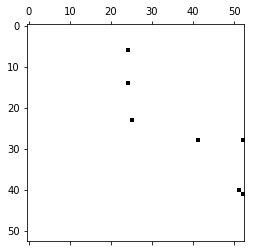

buddy you're a boy make a big noise, playing in the street, 	gonna be a big man some day, you got mud on your face, you big disgrace, 	kicking your can all over the place, singing, we will, we will, rock you, 	we will, we will, rock you
num_syllables:  55
percentile to cut off: 99.0
nonzeros before cutoff: 638
cutoff:  0.9547293883007488
match word  0 ( buddy , 0 ) and word  21 ( mud , 0 ) (rhyme score  0.9624130300290297 )
match word  8 ( playing , 0 ) and word  18 ( day , 0 ) (rhyme score  0.9582108370143159 )
match word  13 ( be , 0 ) and word  36 ( we , 0 ) (rhyme score  0.9547293883007488 )
match word  13 ( be , 0 ) and word  38 ( we , 0 ) (rhyme score  0.9547293883007488 )
match word  24 ( face , 0 ) and word  27 ( disgrace , 1 ) (rhyme score  0.9610066495632574 )
match word  24 ( face , 0 ) and word  34 ( place , 0 ) (rhyme score  0.9590391554146134 )
match word  27 ( disgrace , 1 ) and word  34 ( place , 0 ) (rhyme score  0.9668906549913545 )


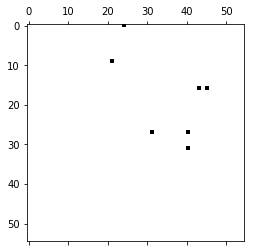

In [9]:
importlib.reload(phonetic)
importlib.reload(verse)
importlib.reload(rhymetools)

for i in [1,4]:
    
    print(verse.get_sample(i))
    verse_template = verse.VerseTemplate(verse.get_sample(i), dictionary, breakrules="phrase") 
    verse_template.add_unknowns("logios_output/g2p.txt")
    
    verse_template.get_rhyme()
    
    plt.spy(verse_template.rhyme_matrix)
    plt.show()

In [22]:
importlib.reload(phonetic)
importlib.reload(verse)
importlib.reload(rhymetools)
importlib.reload(corpus)

corp = corpus.WordCorpus(dictionary)
corp.initialize(verse.get_sample(5), is_filename=False)
print()
print(corp.wordList)
print(corp.wordSeq)
corp.add_unknowns("logios_output/g2p.txt")
print()
print(corp.wordList)
corp.initializeMatrix()
print()
print(corp.wordDict)
corp.initializeSylDict()
print()
print(corp.sylDict)



"dawg" not in dictionary
"trigonometry" not in dictionary
Input text: 11 words, 8 unique

[phonetic.Word("alexander" AE2 L AH0 G Z AE1 N D ER0 ), phonetic.Word("hamilton" HH AE1 M AH0 L T AH0 N ), phonetic.Word("my" M AY1 ), None, phonetic.Word("is" IH1 Z ), phonetic.Word("he" HH IY1 ), phonetic.Word("studies" S T AH1 D IY0 Z ), None]
[0 1 2 3 4 0 1 5 6 7 3]

[phonetic.Word("alexander" AE2 L AH0 G Z AE1 N D ER0 ), phonetic.Word("hamilton" HH AE1 M AH0 L T AH0 N ), phonetic.Word("my" M AY1 ), phonetic.Word("dawg" D AO0 G ), phonetic.Word("is" IH1 Z ), phonetic.Word("he" HH IY1 ), phonetic.Word("studies" S T AH1 D IY0 Z ), phonetic.Word("trigonometry" T R IH0 G AH0 N AH0 M EH0 T R IY0 )]

{'alexander': 0, 'hamilton': 1, 'my': 2, 'dawg': 3, 'is': 4, 'he': 5, 'studies': 6, 'trigonometry': 7}

{'AE': [(0, 0), (0, 5), (1, 1)], 'AH': [(0, 2), (1, 3), (1, 6), (6, 2), (7, 4), (7, 6)], 'ER': [(0, 8)], 'AY': [(2, 1)], 'AO': [(3, 1)], 'IH': [(4, 0), (7, 2)], 'IY': [(5, 1), (6, 4), (7, 11)], 'EH': 

In [45]:
importlib.reload(phonetic)
importlib.reload(corpus)

corp = corpus.WordCorpus(dictionary)
corp.initialize(verse.get_sample(4), is_filename=False)
corp.initializeSylDict()
for key in corp.sylDict.keys():
    print(key, corp.sylDict[key])
for i, word in enumerate(corp.wordList):
    print(i, word)

# help(phonetic)
# get syllable lists from rhyme pairs from the matrix
print("Nonzero indices in rhyme matrix:")
syl_list_1, syl_list_2 = np.nonzero(verse_template.rhyme_matrix)
num_pairs = len(syl_list_1)
print("rows: ", syl_list_1)
print("cols: ", syl_list_2)
print()

for i in range(num_pairs):
    word_1 = verse_template.wordList[verse_template.matrix_indices[i][0]]
    word_1_phoneme = word_1.vowel_at(verse_template.matrix_indices[i][1])
    word_1_phoneme = word_1_phoneme[:-1] # strip stress indicator
    print("First word ( from row ", syl_list_1[i], "): ", word_1.stringRepr)
    print("First word phoneme: ", word_1_phoneme)
    
    second_word_syl_options = corp.sylDict[word_1_phoneme]
    print(second_word_syl_options)
    
    for j in range(len(second_word_syl_options)):
        second_word_idx = second_word_syl_options[j][0]
        print(second_word_idx)
        print(verse_template.wordList[second_word_idx])
    break


Input text: 48 words, 32 unique
AH [(0, 1), (2, 0), (9, 1), (11, 3), (14, 1), (18, 1)]
IY [(0, 3), (10, 3), (12, 1), (29, 1)]
UH [(1, 1)]
OY [(3, 1), (6, 1)]
EY [(4, 1), (7, 2), (15, 1), (21, 1), (22, 5), (27, 2)]
IH [(5, 1), (7, 3), (8, 0), (22, 1), (23, 1), (23, 3), (28, 1), (28, 3), (30, 1)]
AA [(11, 1), (17, 1), (19, 0), (31, 1)]
AE [(13, 1), (24, 1)]
UW [(16, 1)]
AO [(20, 1), (25, 0)]
OW [(26, 0)]
ER [(26, 2)]
0 phonetic.Word("buddy" B AH1 D IY0 )
1 phonetic.Word("you're" Y UH1 R )
2 phonetic.Word("a" AH0 )
3 phonetic.Word("boy" B OY1 )
4 phonetic.Word("make" M EY1 K )
5 phonetic.Word("big" B IH1 G )
6 phonetic.Word("noise" N OY1 Z )
7 phonetic.Word("playing" P L EY1 IH0 NG )
8 phonetic.Word("in" IH0 N )
9 phonetic.Word("the" DH AH0 )
10 phonetic.Word("street" S T R IY1 T )
11 phonetic.Word("gonna" G AA1 N AH0 )
12 phonetic.Word("be" B IY1 )
13 phonetic.Word("man" M AE1 N )
14 phonetic.Word("some" S AH1 M )
15 phonetic.Word("day" D EY1 )
16 phonetic.Word("you" Y UW1 )
17 phonetic.

In [49]:
import nltk
from nltk.corpus import shakespeare

# help(shakespeare)
print(dir(shakespeare))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__unicode__', '__weakref__', '_encoding', '_fileids', '_get_root', '_root', '_tagset', '_unload', '_wrap_etree', 'abspath', 'abspaths', 'citation', 'encoding', 'ensure_loaded', 'fileids', 'license', 'open', 'raw', 'readme', 'root', 'unicode_repr', 'words', 'xml']
